In [46]:
from music21 import *
import pandas as pd
import glob
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.optimizers import Adam

In [47]:
%matplotlib inline

In [48]:
path = '/home/eurismar/notebooks/midi_eurismar'

In [49]:
files = glob.glob('{}/*.mid*'.format(path))

In [55]:
files

['/home/eurismar/notebooks/midi_eurismar/tarrega_adelita.mid',
 '/home/eurismar/notebooks/midi_eurismar/greensleeves.mid']

### tarrega

In [57]:
midi = converter.parse(files[0])

In [61]:
midi.elements

(<music21.stream.Part 0x7ff8cc128dd8>,)

In [62]:
ele = midi.elements[0]

In [63]:
ele.elements

(<music21.instrument.Guitar Guitar>,
 <music21.key.Key of G major>,
 <music21.meter.TimeSignature 4/4>,
 <music21.meter.TimeSignature 3/4>,
 <music21.stream.Voice 0x7ff8cc0c9278>,
 <music21.stream.Voice 0x7ff8cc045a20>,
 <music21.stream.Voice 0x7ff8cc06d4a8>,
 <music21.stream.Voice 0x7ff8cc0052e8>,
 <music21.key.Key of E major>)

In [65]:
voz1 = ele[4]

In [66]:
melodia = voz1.getElementsByClass(note.Note)
notas = melodia.getElementsByClass(note.Note)
for nota in notas:
    coluna1.append(nota.midi)
    coluna2.append(nota.duration.quarterLength)

## greensleaves

In [56]:
coluna1 = []
coluna2 = []
midi = converter.parse(files[0])
part0 = midi[0]
voz = part0[3]
melodia = voz.getElementsByClass(note.Note)
notas = melodia.getElementsByClass(note.Note)
for nota in notas:
    coluna1.append(nota.midi)
    coluna2.append(nota.duration.quarterLength)

AttributeError: 'TimeSignature' object has no attribute 'getElementsByClass'

In [52]:
part0.elements

(<music21.tempo.MetronomeMark Quarter=100.0>,
 <music21.key.Key of C major>,
 <music21.meter.TimeSignature 3/4>,
 <music21.stream.Voice 0x7ff8d4e1b630>,
 <music21.stream.Voice 0x7ff8d4dd8dd8>,
 <music21.stream.Voice 0x7ff8d4faf550>,
 <music21.instrument.Piano Piano>,
 <music21.key.Key of C major>)

In [67]:
df = pd.DataFrame({"nota":coluna1,
                   "duracao":coluna2})

In [68]:
df.head()

,duracao,nota
0,0.5,76
1,0.5,75
2,1.75,71
3,0.5,74
4,0.5,72


In [69]:
df.tail()

,duracao,nota
42,0.5,59
43,0.5,68
44,0.5,63
45,0,66
46,2/3,59


In [70]:
df.describe()

,nota
count,47.000000
mean,67.787234
std,7.002907
min,40.000000
25%,64.000000
50%,69.000000
75%,72.500000
max,76.000000


In [71]:
df['nota'].unique()

array([76, 75, 71, 74, 72, 66, 63, 40, 68, 64, 59, 73, 69, 56])

In [72]:
df['duracao'].unique()

array([0.5, 1.75, 1.0, 0.0, 3.0, Fraction(4, 3), Fraction(1, 3),
       Fraction(2, 3)], dtype=object)

In [73]:
mlb = MultiLabelBinarizer()

In [74]:
mlb.fit(df.values)

MultiLabelBinarizer(classes=None, sparse_output=False)

In [75]:
classes = mlb.classes_

In [76]:
classes

array([0.0, Fraction(1, 3), 0.5, Fraction(2, 3), 1.0, Fraction(4, 3),
       1.75, 3.0, 40, 56, 59, 63, 64, 66, 68, 69, 71, 72, 73, 74, 75, 76],
      dtype=object)

In [77]:
classes.shape

(22,)

In [78]:
labels = mlb.transform(df.values)

In [79]:
labels

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [80]:
labels.shape

(47, 22)

In [81]:
array_notas = df['nota'].values.astype(int)

In [82]:
array_notas.shape

(47,)

In [83]:
array_duracao = df['duracao'].values.astype(float)

In [84]:
scaler = StandardScaler()
rawX = scaler.fit_transform(df.values)

/home/eurismar/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [85]:
rawX

array([[-0.38968434,  1.1854442 ],
       [-0.38968434,  1.04110255],
       [ 1.89971114,  0.46373594],
       [-0.38968434,  0.8967609 ],
       [-0.38968434,  0.60807759],
       [ 1.89971114, -0.25797231],
       [-0.38968434,  0.60807759],
       [-0.38968434,  0.46373594],
       [ 0.52607386, -0.69099727],
       [-1.30544253, -0.25797231],
       [ 4.18910663, -4.01085525],
       [-0.38968434,  1.1854442 ],
       [-0.38968434,  1.04110255],
       [ 1.89971114,  0.46373594],
       [-0.38968434,  0.8967609 ],
       [-0.38968434,  0.60807759],
       [ 1.89971114, -0.25797231],
       [-0.38968434,  0.60807759],
       [-0.38968434,  0.46373594],
       [ 0.52607386, -0.69099727],
       [ 1.13657932,  0.03071099],
       [-0.38968434,  0.46373594],
       [-0.38968434, -0.54665562],
       [-0.38968434, -0.25797231],
       [ 1.13657932,  0.03071099],
       [-0.38968434,  0.46373594],
       [-0.38968434, -0.54665562],
       [-0.38968434, -0.25797231],
       [-0.38968434,

In [86]:
scaler.inverse_transform(rawX[0])

array([ 0.5, 76. ])

In [87]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 30
dataX = []
dataY = []
for i in range(0, rawX.shape[0] - seq_length, 1):
	seq_in = rawX[i:i + seq_length]
	seq_out = labels[i + seq_length]
	dataX.append(seq_in)
	dataY.append(seq_out)
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  17


In [88]:
X = np.reshape(dataX, (len(dataX), seq_length, 2))
y = np.asarray(dataY)

In [89]:
X.shape

(17, 30, 2)

In [90]:
y.shape

(17, 22)

In [91]:
model = Sequential()
model.add(LSTM(256, input_shape=(seq_length, 2),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='sigmoid'))
adam = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam,metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 256)           265216    
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 256)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 22)                5654      
Total params: 796,182
Trainable params: 796,182
Non-trainable params: 0
_________________________________________________________________
None


In [92]:
history = model.fit(X, y, epochs=4,batch_size=32, verbose=1, shuffle=False)

Epoch 1/4
17/17 [==============================] - 0s - loss: 0.6939 - acc: 0.4385
Epoch 2/4
17/17 [==============================] - 0s - loss: 0.6870 - acc: 0.7246
Epoch 3/4
17/17 [==============================] - 0s - loss: 0.6763 - acc: 0.8717
Epoch 4/4
17/17 [==============================] - 0s - loss: 0.6626 - acc: 0.8930


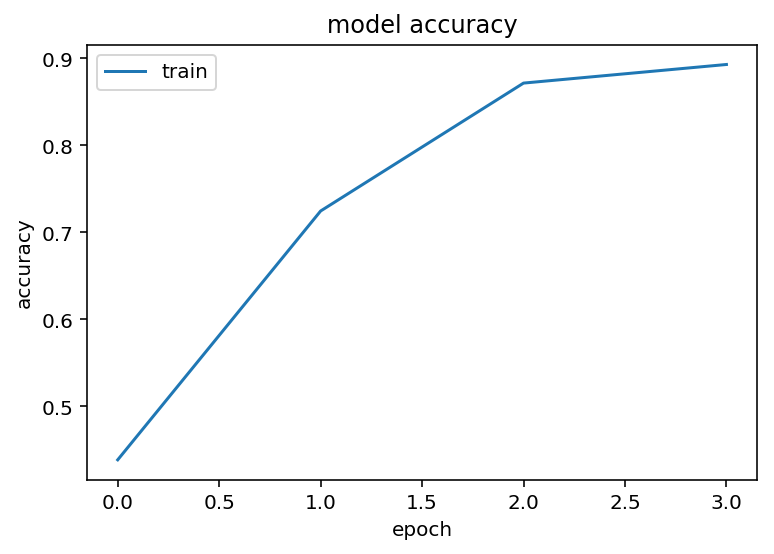

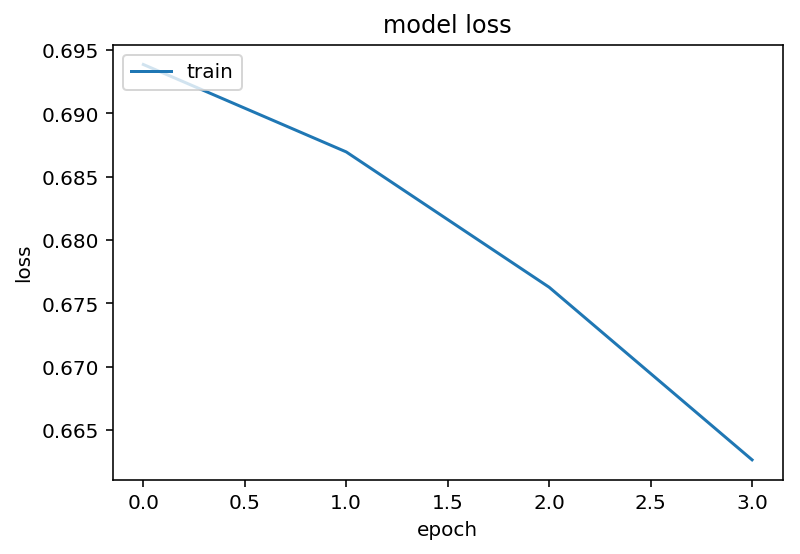

In [93]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Prevendo somente uma label**

In [94]:
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
p = np.reshape(pattern, (1, len(pattern), 2))
prediction = model.predict(p, verbose=0)
idxs = np.argsort(prediction[0])[::-1][:2]
print('idxs:',idxs)
new_pattern = [mlb.classes_[idxs[0]],mlb.classes_[idxs[1]]]
print('antes sort:',new_pattern)
new_pattern.sort()
print('depois sort:',new_pattern)
t = np.asarray(new_pattern)
t1 = t.reshape(1,2)
print(t1)
pt = scaler.transform(t1)
print(pt)

idxs: [ 2 18]
antes sort: [0.5, 73]
depois sort: [0.5, 73]
[[ 0.5 73. ]]
[[-0.38968434  0.75241925]]


## **Prevendo uma sequencia**

In [95]:
len(dataX)

17

In [96]:
start = np.random.randint(0, len(dataX)-1)
print(start)
pattern = dataX[start]
for i in range(10):
    p = np.reshape(pattern, (1, len(pattern), 2))
    prediction = model.predict(p, verbose=0)
    idxs = np.argsort(prediction[0])[::-1][:2]
    new_pattern = [mlb.classes_[idxs[0]],mlb.classes_[idxs[1]]]
    new_pattern.sort()
    t = np.asarray(new_pattern).reshape(1,2)
    pt = scaler.transform(t)
    a = np.concatenate((pattern,pt))
    b = a[1:len(a)]
    pattern = b

11


/home/eurismar/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [97]:
inverso = scaler.inverse_transform(pattern)

In [98]:
sc = stream.Score()
for i in inverso:
    n = note.Note(midi=i[1], quarterLength=i[0])
    sc.append(n)

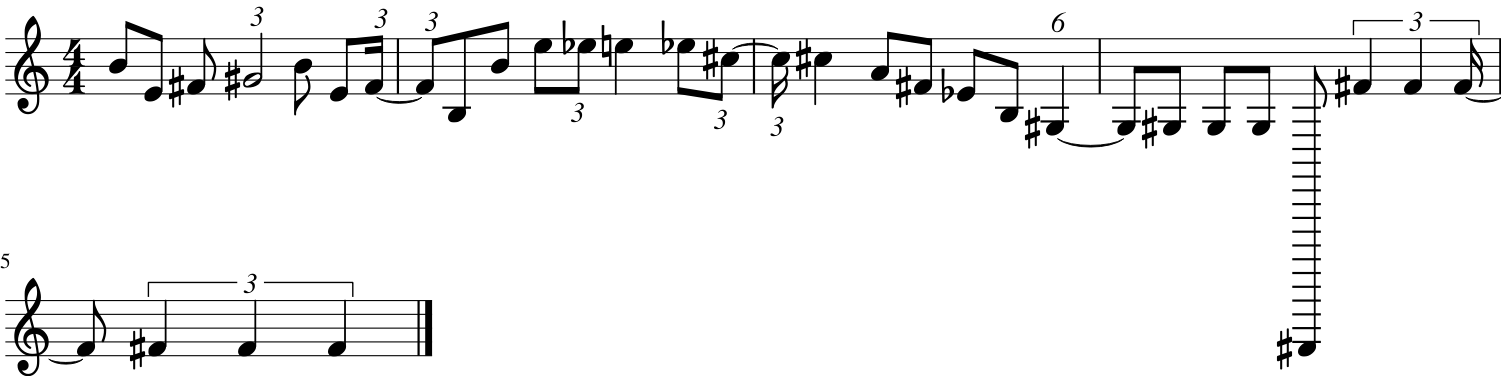

In [99]:
sc.show()

In [100]:
from music21 import *
from datetime import datetime
filename = path+ "/gerada/gerada_" + datetime.now().strftime("%Y%m%d-%H%M%S"+".mid")

In [101]:
mf = midi.translate.streamToMidiFile(sc)
mf.open(filename, 'wb')
mf.write()
mf.close()

In [102]:
filename

'/home/eurismar/notebooks/midi_eurismar/gerada/gerada_20180609-042139.mid'